#제목
##중간제목
이 것은 숙제 1번을 위한 테스트 입니다.  
엔터는 뒤에 스페이스를 두번 넣어주세요.  
  
이건 아이템입니다.
- item  

나는 수학을 다음과 같이 달러 두개로 씁니다
$$ \sum n = n(n+1)\div2 $$


엔터 두번은 단락이 바뀝니다.  
좋은 밤이군요~

In [48]:
import numpy as np
import random as rd


m = 1000
lower = -500
upper = 500
np.random.seed(seed=9832)
perturbations = np.random.normal(0, 100, size=m)
train_set = []
a = 10
b = 7

for x in range(m):
    t = rd.uniform(lower,upper)
    train_set.append([t,a*t+b])
# print(len(train_set))

train_set = np.array(train_set, dtype=np.float32)
# print(train_set)
train_set[:,1] = train_set[:,1] + perturbations
print(train_set)
# print(perturbations)



[[ -277.38037 -2798.459  ]
 [  -58.36025  -456.4207 ]
 [ -366.78122 -3649.9749 ]
 ...
 [  196.78809  1982.4044 ]
 [ -394.98468 -3981.0364 ]
 [ -270.25848 -2794.4229 ]]


유니폼 분포를 사용하여 -500과 500사이의 값을 가져온 뒤에 지정된 선형 함수에 넣습니다.
$$\hat{y} = 10x+7 + X \texttt{~} N(0,1)$$
실수형 numpy array를 만든 후에 정규분포를 띄는 분포에서 가져온 데이터를 y 부분에 넣어주도록 합니다.

[[ -277.38037 -2798.459  ]
 [  -58.36025  -456.4207 ]
 [ -366.78122 -3649.9749 ]
 ...
 [  196.78809  1982.4044 ]
 [ -394.98468 -3981.0364 ]
 [ -270.25848 -2794.4229 ]]


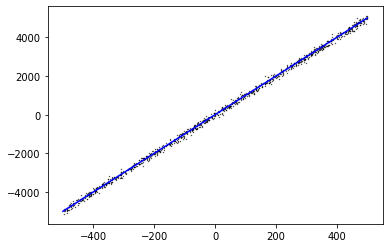

In [49]:

print(train_set)
plt.scatter(train_set[:,0],train_set[:,1], c="black", s=0.1)
plt.plot([lower,upper],[a*lower+b,a*upper+b],'b-')
plt.show()